In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix


%matplotlib inline

In [2]:
df = pd.read_csv("./data/winequality-red.csv")
print(df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
##Update the dataframe; assign the quality a value of 1 or 0 based on the quality score.
quality_guide = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}
df['quality'] = df['quality'].replace(quality_guide)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [4]:
feature_count = df.shape[1] - 1
rows_list = []
for i in range(len(df)):
    new_row = np.array(df.iloc[i,0:feature_count])
    rows_list.append(new_row)
    
x = np.array(rows_list)
y = np.array(df.iloc[:,feature_count])
print(x.shape)
print(y.shape)

(1599, 11)
(1599,)


In [5]:
n = len(y)
randy = np.random.default_rng()
idx = np.arange(n)
randy.shuffle(idx)

## Splits the data into 80% training and 20% validation
train_idx = idx[:int(n*.8)]
val_idx = idx[int(n*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

training_lenth = len(x_train)
validation_length = len(x_val)
print(f"The training data has {training_lenth} observations.")
print(f"The validation data has {validation_length} observations.")

The training data has 1279 observations.
The validation data has 320 observations.


In [6]:
sns.set_theme(palette="flare")
sns.color_palette("flare")

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

## Visualize the Training Data

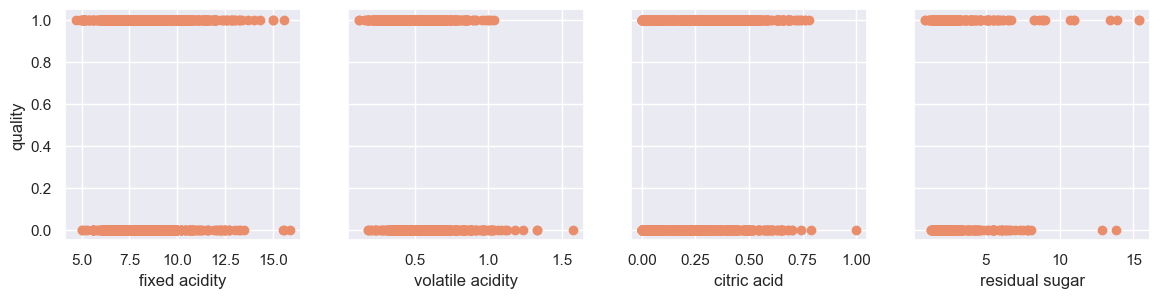

In [7]:
## plot the data from the first four features in side by side graphs
columns = df.columns.tolist()
x_features = columns[:feature_count]
y_feature = columns[feature_count]

fig, ax=plt.subplots(1,4,  figsize=(14,3),  sharey=True)

for i in range(4):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel(y_feature)
plt.show()

In [8]:
## plots logistic data using the first two features as the x y axis
def plot_data(X, y, ax, pos_label, neg_label, s=80, loc='best' ):

    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)

    ax.scatter(X[pos, 0], X[pos, 1], marker='o', s=s, label=pos_label)
    ax.scatter(X[neg, 0], X[neg, 1], marker='x', s=s, label=neg_label, lw=3)
    ax.legend(loc=loc)

    ax.figure.canvas.toolbar_visible = False
    ax.figure.canvas.header_visible = False
    ax.figure.canvas.footer_visible = False

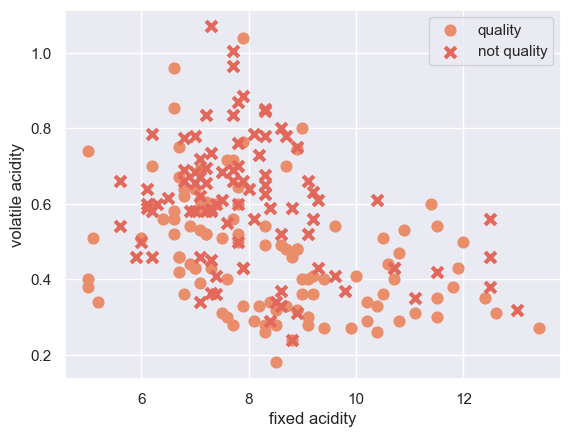

In [9]:
fig, ax = plt.subplots()
plot_data(x_train[0:200], y_train[0:200], ax, "quality", "not quality", s=60)
x_label,y_label = x_features[0:2]
##y_label = y_feature
plt.ylabel(y_label) 
plt.xlabel(x_label) 
plt.legend(loc="upper right")
plt.show()

## Create a Neural Net Model

In [10]:
## Scale Data
abby = tf.keras.layers.Normalization()
abby.adapt(x_train)
x_train_norm = abby(x_train)

In [11]:
## Create Model
#pick number of layers, number of neurons, ReLu activation, desnse layers

Model = Sequential([
    Dense(units=11, activation='relu'),
    Dense(units=9, activation='relu'),
    Dense(units=3, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [12]:
# Compile the model
Model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = Model.fit(x_train_norm, y_train, epochs=175, batch_size=1024, validation_split=0.2)

Epoch 1/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5005 - loss: 0.6928 - val_accuracy: 0.5781 - val_loss: 0.6900
Epoch 2/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5181 - loss: 0.6922 - val_accuracy: 0.5781 - val_loss: 0.6897
Epoch 3/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5191 - loss: 0.6916 - val_accuracy: 0.5781 - val_loss: 0.6894
Epoch 4/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5171 - loss: 0.6910 - val_accuracy: 0.5742 - val_loss: 0.6890
Epoch 5/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5181 - loss: 0.6904 - val_accuracy: 0.5625 - val_loss: 0.6886
Epoch 6/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5171 - loss: 0.6897 - val_accuracy: 0.5703 - val_loss: 0.6882
Epoch 7/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5210 - loss: 0.6891 - val_accuracy: 0.5742 - val_loss: 0.6877
Epoch 8/175
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5200 - loss: 0.6885 - val_accuracy: 0.5625 - val_loss: 0

In [13]:
x_val_norm = abby(x_val)
y_prediction = Model.predict(x_val_norm)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [14]:
print(y_prediction[0:20])

[[0.94073945]
 [0.88338107]
 [0.9724122 ]
 [0.3585184 ]
 [0.34351778]
 [0.4228379 ]
 [0.71875226]
 [0.83291197]
 [0.32141364]
 [0.6413517 ]
 [0.76776576]
 [0.8437387 ]
 [0.35274363]
 [0.5479233 ]
 [0.8761337 ]
 [0.67478406]
 [0.3434664 ]
 [0.31372613]
 [0.9197782 ]
 [0.4111744 ]]


In [15]:
y_prediction = (y_prediction >= 0.5).astype(int)

## Look at the Results

In [16]:
print(y_val.shape)
print(y_prediction.shape)

(320,)
(320, 1)


In [17]:
y_prediction = y_prediction.reshape(-1)
fig_newton = np.array([y_val,y_prediction])

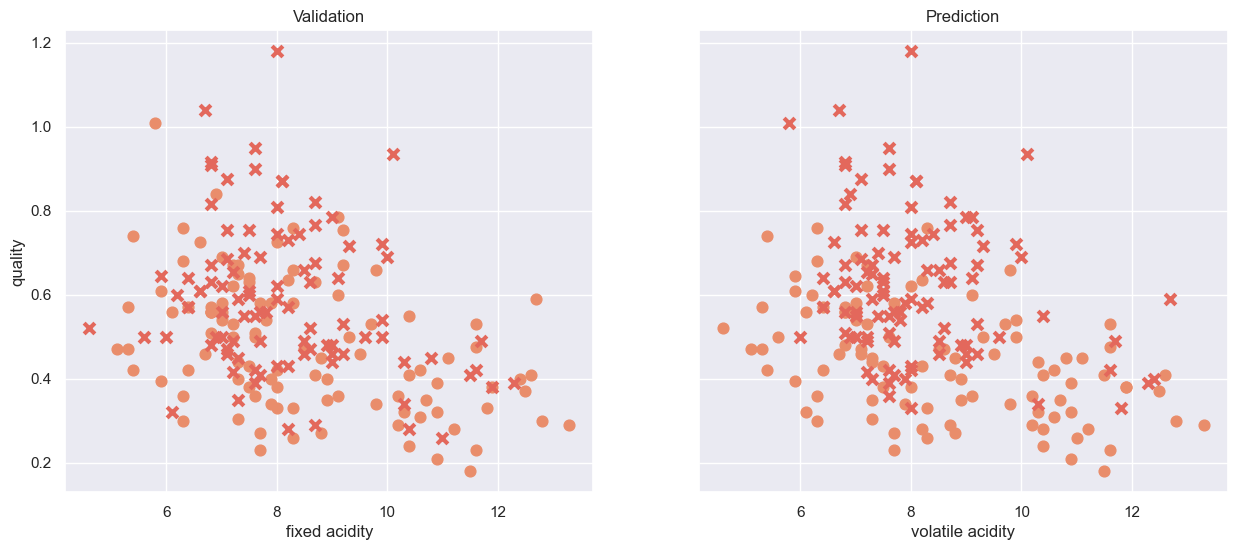

In [18]:
x_titles = ['Validation', 'Prediction']

fig, ax=plt.subplots(1,2,  figsize=(15,6),  sharey=True)

for i in range(2):
    y=fig_newton[i,0:200]
    x=x_val[0:200]

    pos = y == 1
    neg = y == 0
    pos = pos.reshape(-1,)
    neg = neg.reshape(-1,)
    #ax.legend(loc=loc)

    ax[i].scatter(x[pos, 0], x[pos, 1], marker='o', s=60, label='pos_label')
    ax[i].scatter(x[neg, 0], x[neg, 1], marker='x', s=60, label='neg_label', lw=3)
    ax[i].set_xlabel(x_features[i])
    ax[i].set_title(x_titles[i])
ax[0].set_ylabel(y_feature)
plt.show()

## Confusion Matrix

In [19]:
cm = confusion_matrix(y_val, y_prediction)

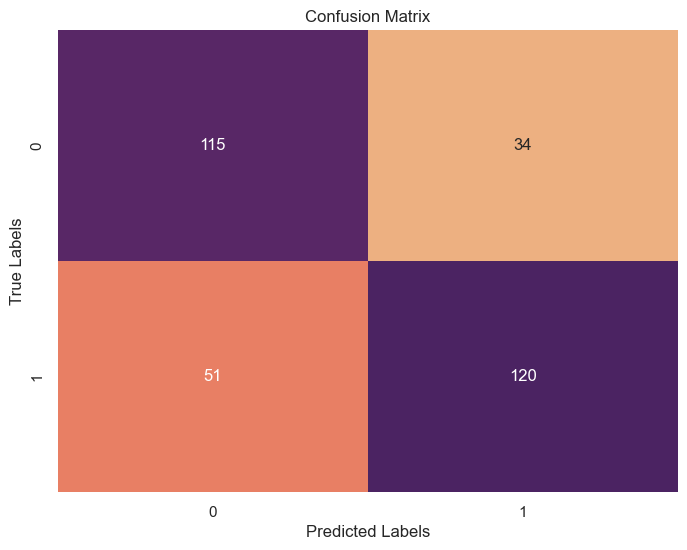

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

## Calculate the percentage of correct results

In [21]:
matches = y_val == y_prediction  # This returns a boolean array

# Calculate the percentage of matches
percentage_match = np.sum(matches) / len(y_val) * 100

print(f"Percentage of matching elements: {percentage_match}%")

Percentage of matching elements: 73.4375%
